# Benchmarking Weiss' algorithm

In [1]:
from nlft_qsp.poly import Polynomial
from nlft_qsp.rand import random_polynomial

from nlft_qsp.solvers import weiss

import time

import matplotlib.pyplot as plt

NumpyBackend -- chosen dtypes: complex128, float64


In [2]:
def plain_weiss(b: Polynomial, eta) -> Polynomial:
    return weiss.complete(b, verbose=True)

def direct_weiss(b: Polynomial, eta) -> Polynomial:
    return weiss.weiss_internal_new(b, eta=eta, verbose=True)

In [3]:
test_degrees = [1000000] #[5, 10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000, 200000, 500000, 1000000]
test_etas = [0.01]#[0.5, 0.1, 0.01, 0.001]

test_algorithms = {
    #"WEISS1":                plain_weiss,
    "WEISS2":                direct_weiss
}

test_deg_limits = { # to avoid inefficient algorithms to take ages
    #"WEISS1":   1000000,
    "WEISS2":   1000000
}

test_results = {}
for k in test_algorithms.keys():
    test_results[k] = []

In [ ]:
for n in test_degrees:
    for eta in test_etas:
        print(f"Starting test degrees n = {n}, eta = {eta}.")
        b = random_polynomial(n+1, eta=eta)
    
        for alg in test_algorithms.keys():
            print(f"\r- Algorithm {alg}                             ",end='')

            if alg in test_deg_limits and n > test_deg_limits[alg]:
                continue

            t0 = time.process_time_ns()
            a = test_algorithms[alg](b, eta)
            t1 = time.process_time_ns()

            t = t1 - t0
            completion_err = (a * a.conjugate() + b * b.conjugate() - 1).l2_norm()

            test_results[alg].append({ "degree": n, "eta": eta, "time": t, "completion_err": completion_err })
        print("\rdone.                             ")

Starting test degrees n = 1000000, eta = 0.01.


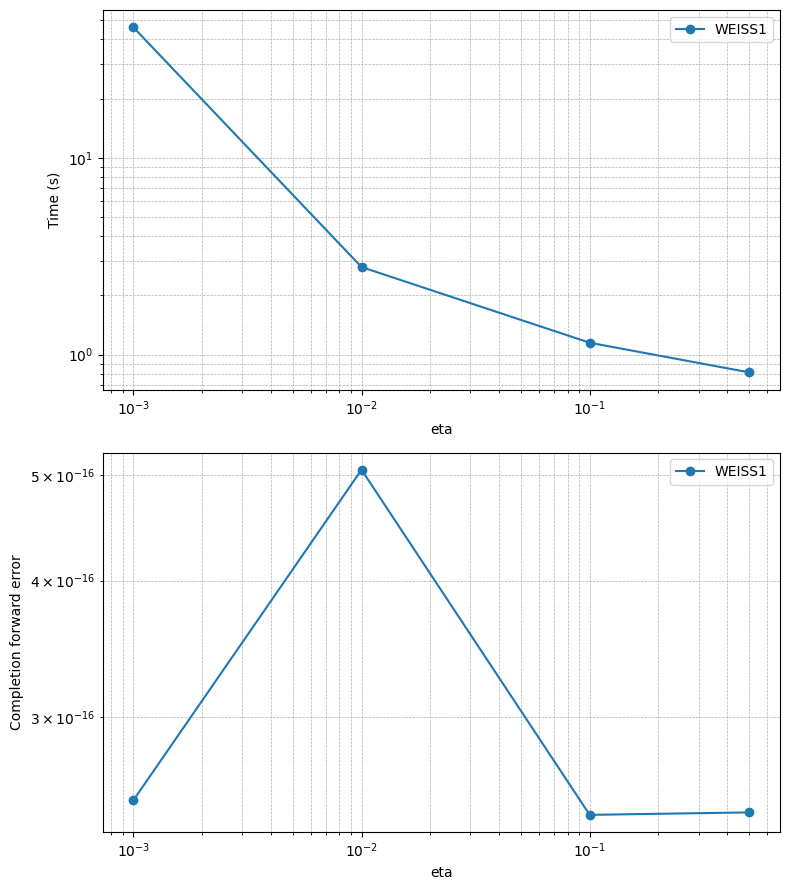

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(8, 9))

for label, results in test_results.items():
    degrees = [entry['degree'] for entry in results]
    etas = [entry['eta'] for entry in results]
    times = [entry['time']/1000000000 for entry in results]
    comp_errs = [entry['completion_err'] for entry in results]

    axes[0].plot(etas, times, marker='o', label=label)
    axes[1].plot(etas, comp_errs, marker='o', label=label)

for ax, ylabel in zip(axes, ['Time (s)', 'Completion forward error']):
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('eta')
    ax.set_ylabel(ylabel)
    ax.legend()
    ax.grid(True, which='both', ls='--', linewidth=0.5)

plt.tight_layout()
plt.show()

In [ ]:
from datetime import datetime
import json

current_date = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

with open(f'benchmarks/benchmarks_weiss_{current_date}.json', 'w') as fp:
    json.dump(test_results, fp)